## Task 3 - Experience Analytics

In [60]:
#importing libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [61]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('max_column', None)
data = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [63]:
df = data[['MSISDN/Number','Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)',
                 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]

In [64]:
df.head(10)

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,44.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,26.0
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,6.0,9.0
3,3.375034e+10,undefined,109.795706,17.662883,44.0,44.0
4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,6.0,9.0
5,3.366819e+10,undefined,109.795706,17.662883,70.0,54.0
6,3.366537e+10,Huawei Mate 20 Lite,102.000000,5.000000,22.0,38.0
7,3.376349e+10,undefined,39.000000,18.000000,3698.0,416.0
8,3.369874e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,46.0,49.0
9,3.365922e+10,Samsung Galaxy Note 8 (Sm-N950F Ds),97.000000,7.000000,3845.0,2535.0


In [68]:
df['Avg RTT DL (ms)'].fillna(value=df['Avg RTT DL (ms)'].mean(), inplace=True)
df['Avg RTT UL (ms)'].fillna(value=df['Avg RTT UL (ms)'].mean(), inplace=True)

In [69]:
df['Avg Bearer TP DL (kbps)'].fillna(value=df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(value=df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

In [70]:
df.isnull().sum(axis=0)

MSISDN/Number              1066
Handset Type                572
Avg RTT DL (ms)               0
Avg RTT UL (ms)               0
Avg Bearer TP DL (kbps)       0
Avg Bearer TP UL (kbps)       0
dtype: int64

In [71]:
df['Avg Bearer TP DL (kbps)'].fillna(value=df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(value=df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

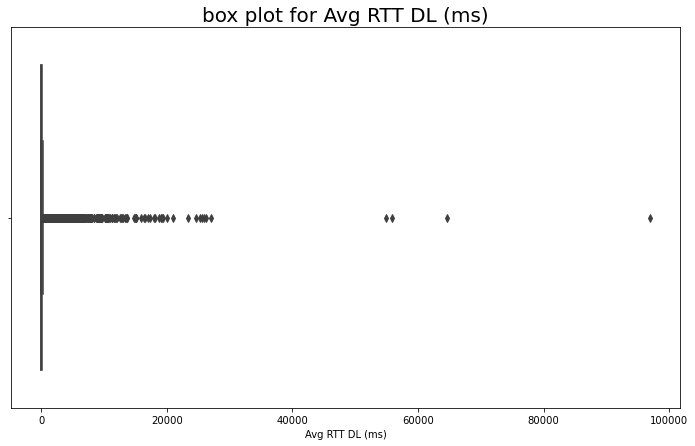

In [72]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='Avg RTT DL (ms)')
plt.title("box plot for Avg RTT DL (ms)", size=20)
plt.show()

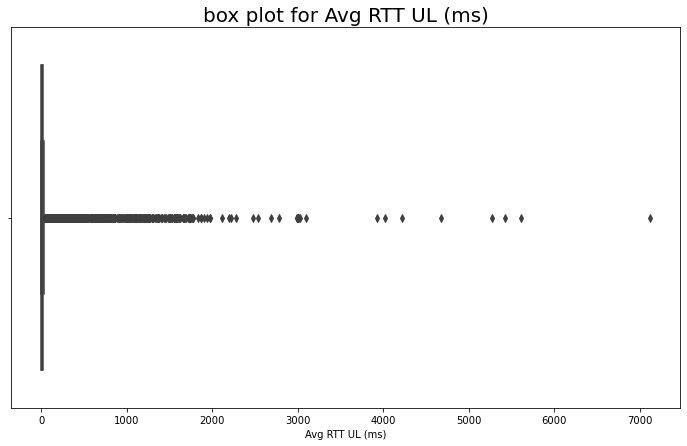

In [73]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg RTT UL (ms)')
plt.title("box plot for Avg RTT UL (ms)", size=20)
plt.show()

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

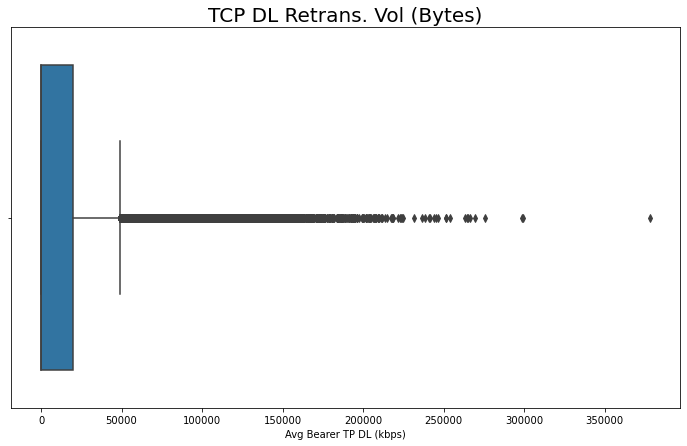

In [76]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_exp, x='Avg Bearer TP DL (kbps)')
plt.title("TCP DL Retrans. Vol (Bytes)", size=20)
plt.show()

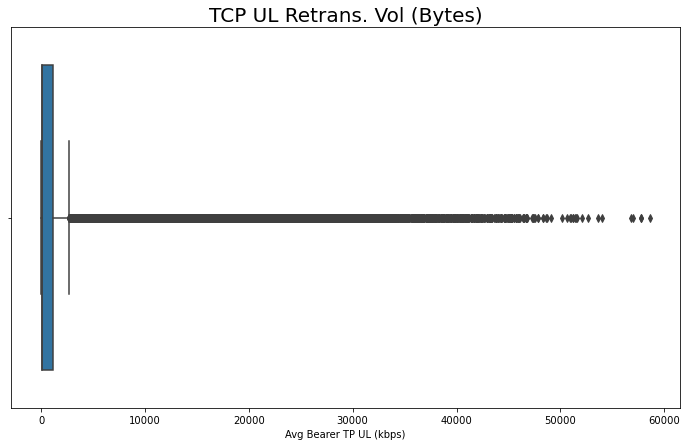

In [77]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg Bearer TP UL (kbps)')
plt.title("TCP UL Retrans. Vol (Bytes)", size=20)
plt.show()

In [78]:
df['Avg RTT DL (ms)'] = np.where(df['Avg RTT DL (ms)'] > 220, 54, df['Avg RTT DL (ms)'])

In [79]:
#Printing the median and percentile of Avg RTT UL (ms)
df['Avg RTT UL (ms)'].describe()

count    150001.000000
mean         17.662883
std          76.529933
min           0.000000
25%           3.000000
50%           7.000000
75%          17.662883
max        7120.000000
Name: Avg RTT UL (ms), dtype: float64

In [83]:
df['Avg RTT DL (ms)'].describe()

count    150001.000000
mean         64.169484
std          37.817597
min           0.000000
25%          35.000000
50%          54.000000
75%         104.000000
max         220.000000
Name: Avg RTT DL (ms), dtype: float64

In this section, you’re expected to focus on network parameters like TCP retransmission, Round Trip Time (RTT), Throughput, and the customers’ device characteristics like the handset type to conduct a deep user experience analysis. The network parameters are all columns in the dataset.

### Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput

### Compute & list 10 of the top, bottom and most frequent:
- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.


### Compute & report:
- The distribution of the average throughput  per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.
